# Data Analysis and Pre-Processing

The data is fetched from: https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset?resource=download
The key challenge against its detection is how to classify tumors into malignant (cancerous) or benign (non-cancerous), but before we check how each classification algorithms fares lets look at the data.

In [48]:
from sklearn.model_selection import train_test_split
from feature_scaler import *

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Exploratory Analysis

In [30]:
df = pd.read_csv('./data/breast-cancer.csv')
print(df.shape)

(569, 32)


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [32]:
# df.isna().sum()
df.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

It appears that there are no missing values in our dataset.

In [33]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


### Data Visualization

In [34]:
# Color palettes:
palette = [sns.color_palette('crest'),
    sns.color_palette('mako'),
    sns.color_palette('viridis'),
    sns.color_palette('flare'),
    sns.color_palette('rocket'),
    sns.color_palette('rocket_r'),
    sns.color_palette('magma'),
    sns.color_palette('inferno'),
    sns.cubehelix_palette()]

In [35]:
data_diagnosis = df.diagnosis.value_counts()
data_diagnosis = pd.DataFrame({
    'diagnosis': data_diagnosis.keys(),
    'values': data_diagnosis.values
    })

data_diagnosis

,diagnosis,values
0,B,357
1,M,212


`'B'` stands for benign and `'M'` for malignant cancer.

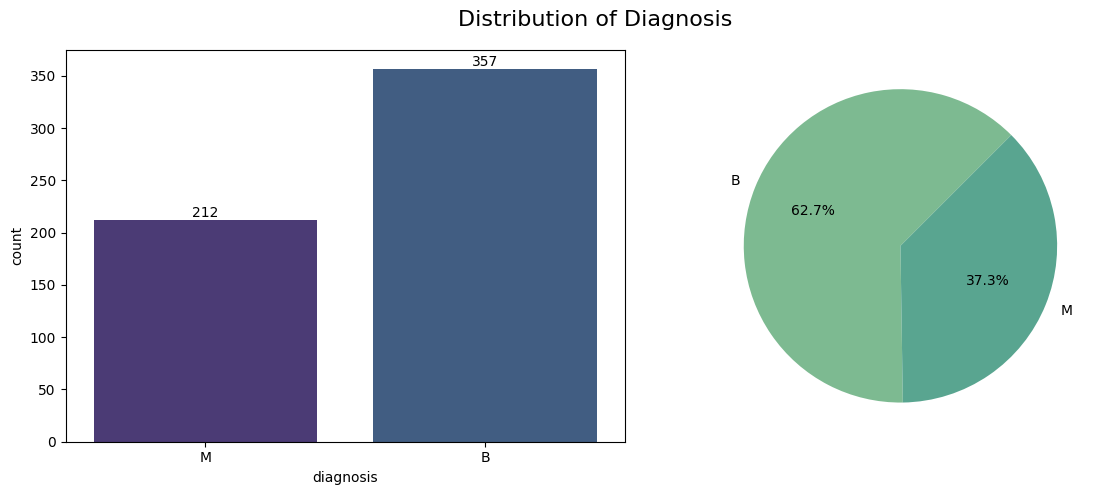

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5)) # creating a 1x2 subplot grid
sns.countplot(x=df['diagnosis'], ax=axes[0], palette=palette[2])
axes[0].bar_label(axes[0].containers[0])

axes[1].pie(x=data_diagnosis['values'], labels=data_diagnosis['diagnosis'], autopct='%1.1f%%', startangle=45, colors=palette[0])
plt.suptitle('Distribution of Diagnosis', fontsize=16) # title for the entire drawing
plt.tight_layout() # adjust layout to prevent overlapping
plt.show()

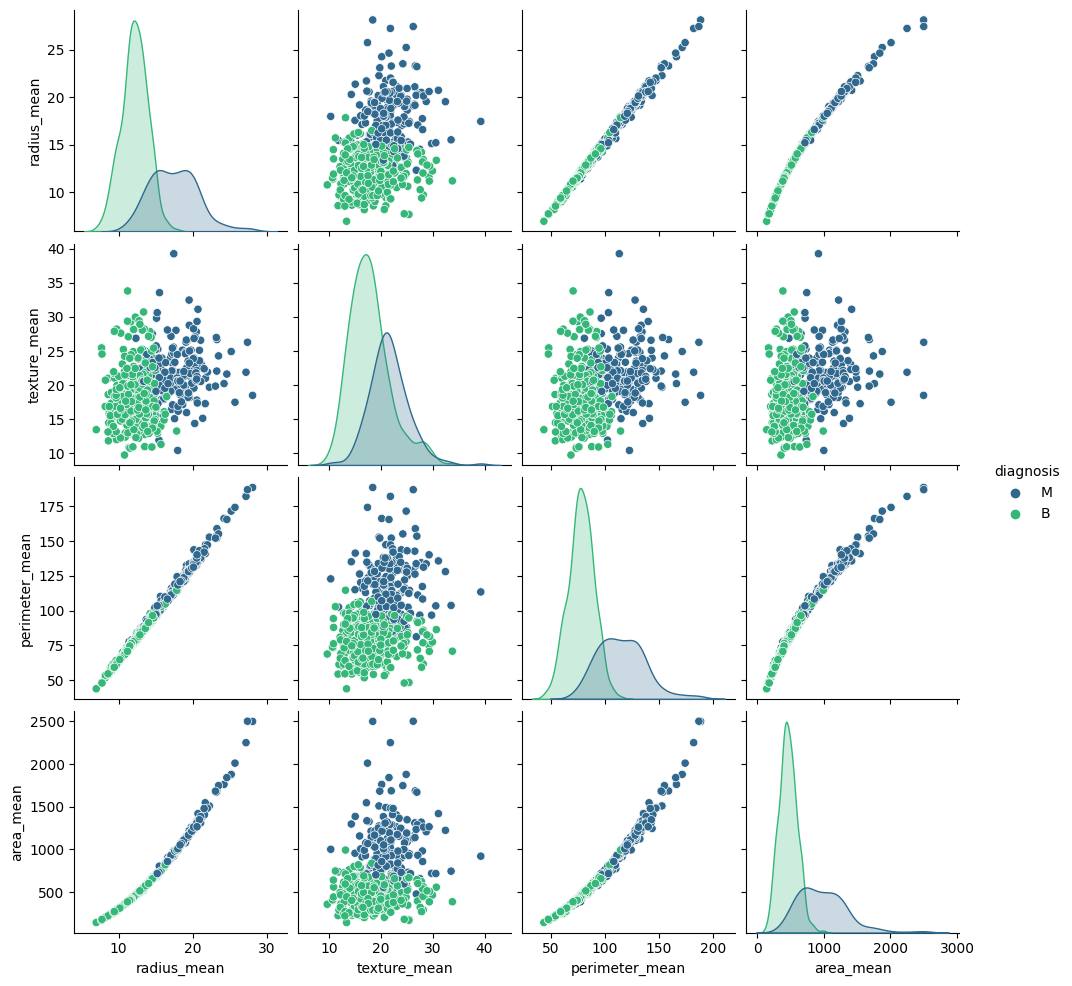

In [37]:
sns.pairplot(df[df.columns[1:6]], hue='diagnosis', palette='viridis')
plt.show()

Heatmap shows correlation used to find potential relationships between different features and shows the strength of the these relationships. If the correlation coefficient is close to 1, it means that certain features have strong relationship. By removing features when the correlation between them exceeds a certain threshold we can improve the performance and interpretability of given model. It makes data more reliable and less sensitive to variations in the dataset.

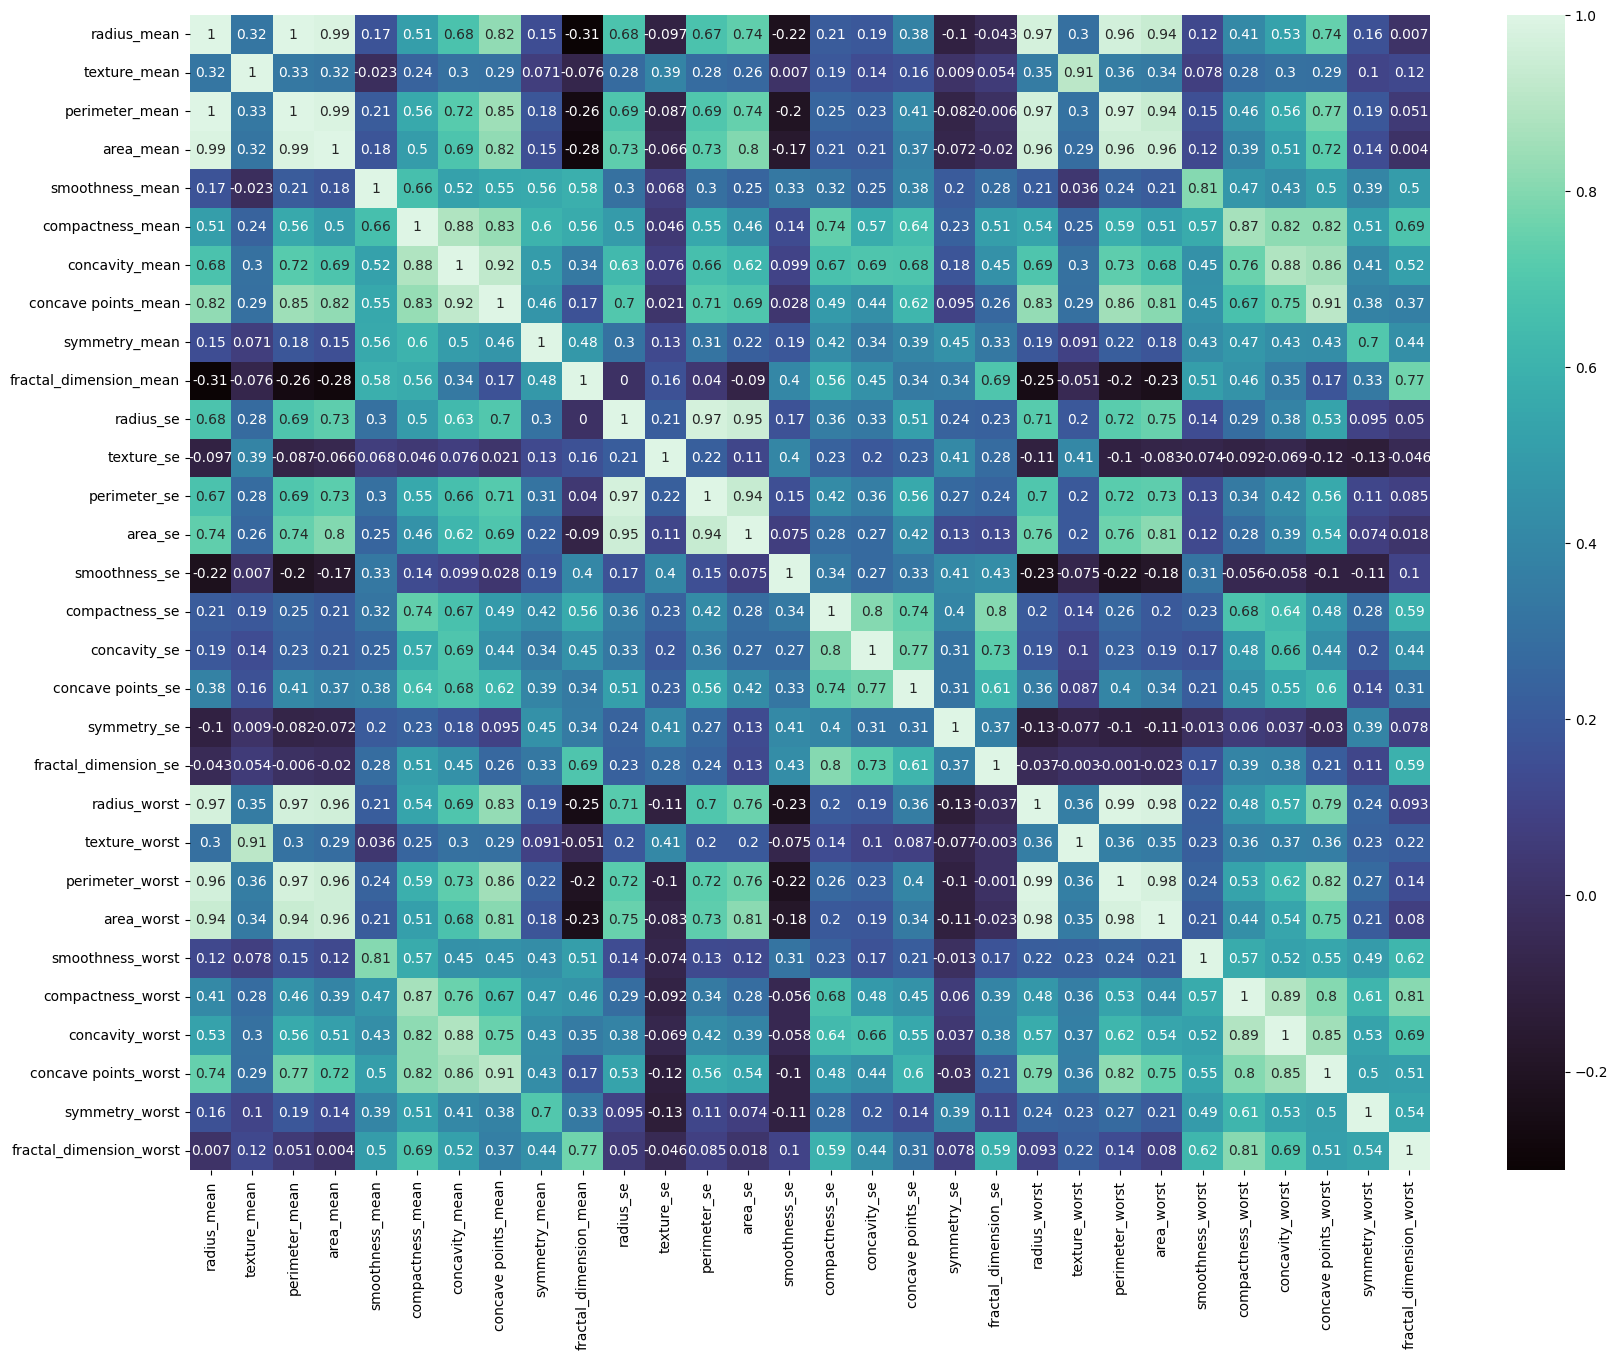

In [38]:
df.drop(columns=['id', 'diagnosis'], axis=1, inplace=True)
data_correlation = df.corr(numeric_only=True).round(3)
plt.figure(figsize=(20, 15))
sns.heatmap(data_correlation, annot=True, cmap='mako')
plt.show()

In [39]:
correlation_threshold = 0.9

#  Selecting upper traingle of correlation matrix
upper_matrix = data_correlation.where(np.triu(np.ones(data_correlation.shape), k=1).astype(bool))
# Finding index of feature columns with correlation greater than threshold
features_to_drop = [x for x in upper_matrix.columns if any(upper_matrix[x] > correlation_threshold)]

# Removing features if the correlation greater than threshold
df.drop(df[features_to_drop], axis=1, inplace=True)
df

,radius_mean,texture_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,smoothness_worst,compactness_worst,concavity_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,0.11840,0.27760,0.30010,0.2419,0.07871,1.0950,0.9053,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,0.16220,0.66560,0.7119,0.4601,0.11890
1,20.57,17.77,0.08474,0.07864,0.08690,0.1812,0.05667,0.5435,0.7339,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,0.12380,0.18660,0.2416,0.2750,0.08902
2,19.69,21.25,0.10960,0.15990,0.19740,0.2069,0.05999,0.7456,0.7869,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,0.14440,0.42450,0.4504,0.3613,0.08758
3,11.42,20.38,0.14250,0.28390,0.24140,0.2597,0.09744,0.4956,1.1560,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,0.20980,0.86630,0.6869,0.6638,0.17300
4,20.29,14.34,0.10030,0.13280,0.19800,0.1809,0.05883,0.7572,0.7813,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,0.13740,0.20500,0.4000,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,0.11100,0.11590,0.24390,0.1726,0.05623,1.1760,1.2560,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,0.14100,0.21130,0.4107,0.2060,0.07115
565,20.13,28.25,0.09780,0.10340,0.14400,0.1752,0.05533,0.7655,2.4630,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,0.11660,0.19220,0.3215,0.2572,0.06637
566,16.60,28.08,0.08455,0.10230,0.09251,0.1590,0.05648,0.4564,1.0750,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,0.11390,0.30940,0.3403,0.2218,0.07820
567,20.60,29.33,0.11780,0.27700,0.35140,0.2397,0.07016,0.7260,1.5950,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,0.16500,0.86810,0.9387,0.4087,0.12400


As we can see we droped 10 columns.

## Pre-processing

In [40]:
# Encoding categorical variables?
# Feature scaling with similar range? It prevent features with larger scales from dominating those with smaller scales during model training, e.g.        
#   - standardization (subtracting the mean and dividing by the standard deviation)
#   - normalization (scaling features to a range between 0 and 1).

In [41]:
from sklearn.preprocessing import StandardScaler
def data_standardization(data):
    scaler = StandardScaler()
    return scaler.fit_transform(data)

In [42]:
# Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(x)
X_pca.explained_variance_ratio_mean

NameError: name 'x' is not defined

In [ ]:
# Spliting data into training and testing sets
X = df.drop(columns=["diagnosis"])
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Evaluation Metrics

Evaluation metrics help us understand the model performance. We use them to check if we are actually making any progress with given model, because we need to knw whether model is giving accurate and accurate results or not.

Because in our project we deal with classification our evaluation metrics will be:
- Accuracy,
- F1 score,
- Precision,
- Recall,
- Specificity,
- Confusion matrix,
- AUC.

**Accuracy** - measures the ratio of correct predictions over the total number of instances evaluated.
$$
\frac{TP + TN}{TP + TN + FP + FN}
$$

**F1 Score** - 
$$
\frac{2 \cdot Precision \cdot Recall}{Precision + Recall}
$$

**Precision** - 
$$
\frac{TP}{TP + FP}
$$

**Recall or Sensitivity** -
$$
\frac{TP}{TP + FN}
$$

**Specificity** - 
$$
\frac{TN}{TN + FP}
$$

**Confusion Matrix** - classification result table, used to find out model performance in classification modeling.

